In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
def play(k, probs):
    return np.random.uniform() < probs[k]

def initialize(d, L):
    B = np.repeat(np.reshape(np.eye(d), (1, d, d)), L, axis=0)
    mu = np.zeros((L, d))
    f = np.zeros((L, d))
    return B, mu, f

def mu_sampler(mu, B, v):
    L = mu.shape[0]
    d = mu.shape[1]
    mu_s = np.zeros((L, d))
  
    for k in range(L):
        mu_s[k] = np.random.multivariate_normal(mu[k], v * v * np.linalg.inv(B[k]))
  
    return mu_s

def best_arm(mu, c):
    return np.argmax(np.matmul(mu, c))

In [12]:
probs = [0.8, 0.3, 0.5, 0.6] # win probabilities
L = len(probs) # number of arms
d = 3 # dimension of the context vector

# hyperparameters
R = 2.5
z = 0.2
gamma = 0.6

v = R * np.sqrt(24 / z * d * np.log(1 / gamma))
print("v = {}".format(v))

v = 33.90217770989762


In [13]:
T = 2000
B, mu, f = initialize(d, L)
c = np.ones(d) # context vector
expec_reward_story = np.zeros((1, L)) # 


for t in range(T-1):
    mu_samp = mu_sampler(mu, B, v)
    k_best = best_arm(mu_samp, c)
    received_rew = play(k_best, probs)*10
  
  
    B[k_best] += np.matmul(c.reshape((c.shape[0]), 1), c.reshape((1, c.shape[0])))
    f[k_best] += received_rew * c
    mu[k_best] = np.matmul(np.linalg.inv(B[k_best]), f[k_best])
  
    expec_reward = np.matmul(mu, c).reshape((1, L))
    expec_reward_story = np.concatenate((expec_reward_story, expec_reward), axis=0)

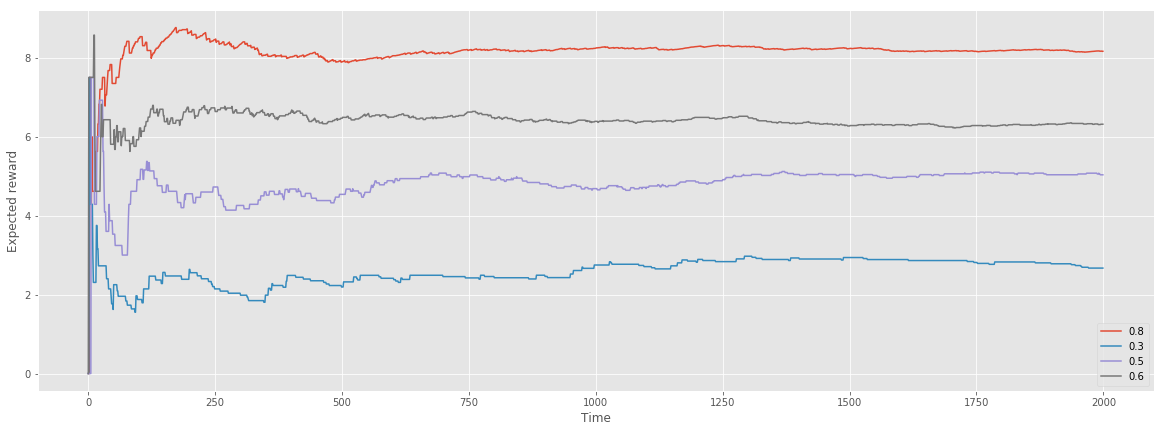

In [14]:
plt.figure(figsize=(20, 7))
for i in range(L):
    plt.plot(expec_reward_story[:, i])
    plt.legend(probs)
    plt.xlabel("Time")
    plt.ylabel("Expected reward")